In [1]:
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt
import pandas as pd
import os
# from pysurvival.utils.display import correlation_matrix

## Data Loading

In [2]:
path_to_labels = '/media/katy/Data/ICC/HDFS/Labels'
path_to_features = '/media/katy/Data/ICC/HDFS/FeatureSelection'

train_liver_labels = pd.read_excel(os.path.join(path_to_labels, 'Liver/HCC_MCRC_ICC_HDFS_liver_80_20_train.xlsx'))
test_liver_labels = pd.read_excel(os.path.join(path_to_labels, 'Liver/HCC_MCRC_ICC_HDFS_liver_80_20_test.xlsx'))
liver_features = pd.read_excel(os.path.join(path_to_features, 'HCC_MCRC_ICC_HDFS_liver_notumors_features.xlsx'))
liver_tumor_features = pd.read_excel(os.path.join(path_to_features, 'HCC_MCRC_ICC_HDFS_liver_withtumor_features.xlsx'))

train_tumor_labels = pd.read_excel(os.path.join(path_to_labels, 'Tumor/HCC_MCRC_ICC_HDFS_tumor_80_20_train.xlsx'))
test_tumor_labels = pd.read_excel(os.path.join(path_to_labels, 'Tumor/HCC_MCRC_ICC_HDFS_tumor_80_20_test.xlsx'))
tumor_features = pd.read_excel(os.path.join(path_to_features, 'HCC_MCRC_ICC_HDFS_indextumor_features.xlsx'))

train_liver_feats_and_labels = pd.merge(train_liver_labels, liver_features, how='inner', on=['ScoutID', 'ScoutID'])
test_liver_feats_and_labels = pd.merge(test_liver_labels, liver_features, how='inner', on=['ScoutID', 'ScoutID'])

train_liver_tumor_feats_and_labels = pd.merge(train_liver_labels, liver_tumor_features, how='inner', on=['ScoutID', 'ScoutID'])
test_liver_tumor_feats_and_labels = pd.merge(test_liver_labels, liver_tumor_features, how='inner', on=['ScoutID', 'ScoutID'])

train_tumor_feats_and_labels = pd.merge(train_tumor_labels, tumor_features, how='inner', on=['ScoutID', 'ScoutID'])
test_tumor_feats_and_labels = pd.merge(test_tumor_labels, tumor_features, how = 'inner', on=['ScoutID', 'ScoutID'])

In [6]:
# train_liver_feats_and_labels.to_excel("/media/katy/Data/ICC/HDFS/Liver/train_liver_feats_and_labels.xlsx", index=False)
# test_liver_feats_and_labels.to_excel("/media/katy/Data/ICC/HDFS/Liver/test_liver_feats_and_labels.xlsx", index=False)

# train_tumor_feats_and_labels.to_excel("/media/katy/Data/ICC/HDFS/Tumor/train_tumor_feats_and_labels.xlsx", index=False)
# test_tumor_feats_and_labels.to_excel("/media/katy/Data/ICC/HDFS/Tumor/test_tumor_feats_and_labels.xlsx", index=False)

In [4]:
train_liver_feats_and_labels.columns

Index(['ScoutID', 'HDFS_Time', 'HDFS_Code', 'Cancer_Type', '10Percentile',
       '90Percentile', 'Energy', 'Entropy', 'InterquartileRange', 'Kurtosis',
       'Maximum', 'MeanAbsoluteDeviation', 'Mean', 'Median', 'Minimum',
       'Range', 'RobustMeanAbsoluteDeviation', 'RootMeanSquared', 'Skewness',
       'TotalEnergy', 'Uniformity', 'Variance', 'Busyness', 'Coarseness',
       'Complexity', 'Contrast', 'Strength', 'Elongation', 'Flatness',
       'LeastAxisLength', 'MajorAxisLength', 'Maximum2DDiameterColumn',
       'Maximum2DDiameterRow', 'Maximum2DDiameterSlice', 'Maximum3DDiameter',
       'MeshVolume', 'MinorAxisLength', 'Sphericity', 'SurfaceArea',
       'SurfaceVolumeRatio', 'VoxelVolume'],
      dtype='object')

In [4]:
X_liver = train_liver_feats_and_labels.drop(labels=['ScoutID', 'HDFS_Time', 'HDFS_Code', 'Cancer_Type'], axis=1)

feats = list(X_liver.columns)
# feats

## Assumptions checking

### Liver

Text(0.5, 1.0, 'HDFS for liver Mean levels')

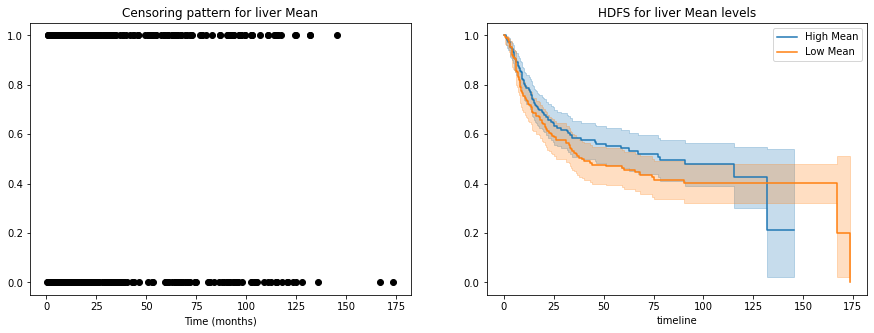

In [130]:
feature = feats[8]

# Censoring check
# Binarize the feature around the median for censoring check
train_feature = train_liver_feats_and_labels[feature]
bin_feature = train_feature > train_feature.median()
bin_feature = bin_feature.to_numpy(dtype="float")

high_label = "High " + feature
low_label = "Low " + feature

fig, ax = plt.subplots(1, 2, figsize=(15,5))
censor = plt.subplot(121)
ax[0].set_title("Censoring pattern for liver " + feature)
ax[0].set_xlabel("Time (months)")

censor.plot(train_liver_labels.HDFS_Time, bin_feature, 'o', color='black')

# Kaplan meier checking
high_feature = train_liver_feats_and_labels.loc[bin_feature == 1]
low_feature = train_liver_feats_and_labels.loc[bin_feature == 0]
km = plt.subplot(122)

kmf = KaplanMeierFitter()
kmf.fit(high_feature.HDFS_Time, high_feature.HDFS_Code, label=high_label)
kmf.plot_survival_function(ax=km)

kmf.fit(low_feature.HDFS_Time, low_feature.HDFS_Code, label=low_label)
kmf.plot_survival_function(ax=km)

title = "HDFS for liver " + feature + " levels"
plt.title(title)

### Tumor

Text(0.5, 1.0, 'HDFS for tumor VoxelVolume levels')

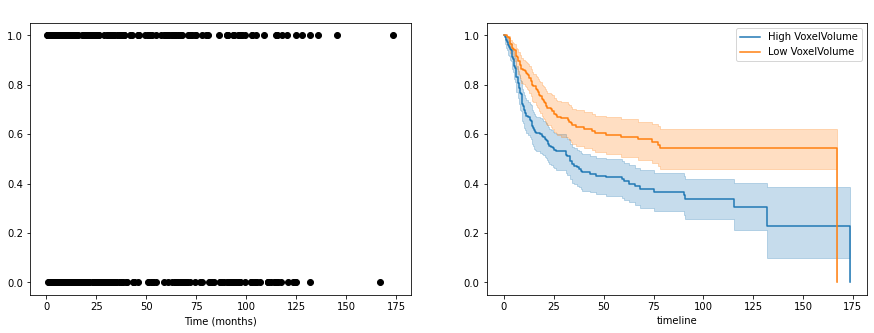

In [87]:
feature = feats[36]

# Censoring check
# Binarize the feature around the median for censoring check
train_feature = train_tumor_feats_and_labels[feature]
bin_feature = train_feature > train_feature.median()
bin_feature = bin_feature.to_numpy(dtype="float")

high_label = "High " + feature
low_label = "Low " + feature

fig, ax = plt.subplots(1, 2, figsize=(15,5))
censor = plt.subplot(121)
ax[0].set_title("Censoring pattern for tumor " + feature, color='white')
ax[0].set_xlabel("Time (months)")

censor.plot(train_tumor_labels.HDFS_Time, bin_feature, 'o', color='black')

# Kaplan meier checking
high_feature = train_tumor_feats_and_labels.loc[bin_feature == 1]
low_feature = train_tumor_feats_and_labels.loc[bin_feature == 0]
km = plt.subplot(122)

kmf = KaplanMeierFitter()
kmf.fit(high_feature.HDFS_Time, high_feature.HDFS_Code, label=high_label)
kmf.plot_survival_function(ax=km)

kmf.fit(low_feature.HDFS_Time, low_feature.HDFS_Code, label=low_label)
kmf.plot_survival_function(ax=km)

title = "HDFS for tumor " + feature + " levels"
plt.title(title, color='white')

### Liver and Tumor

Text(0.5, 1.0, 'HDFS for liver + tumor VoxelVolume levels')

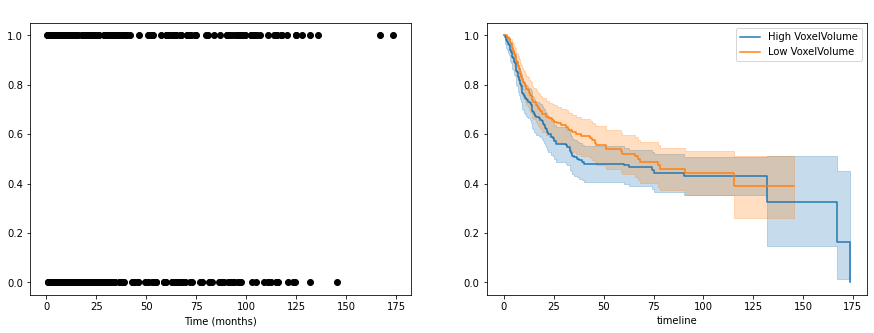

In [128]:
feature = feats[36]

# Censoring check
# Binarize the feature around the median for censoring check
train_feature = train_liver_tumor_feats_and_labels[feature]
bin_feature = train_feature > train_feature.median()
bin_feature = bin_feature.to_numpy(dtype="float")

high_label = "High " + feature
low_label = "Low " + feature

fig, ax = plt.subplots(1, 2, figsize=(15,5))
censor = plt.subplot(121)
ax[0].set_title("Censoring pattern for tumor " + feature, color='white')
ax[0].set_xlabel("Time (months)")

censor.plot(train_liver_labels.HDFS_Time, bin_feature, 'o', color='black')

# Kaplan meier checking
high_feature = train_liver_tumor_feats_and_labels.loc[bin_feature == 1]
low_feature = train_liver_tumor_feats_and_labels.loc[bin_feature == 0]
km = plt.subplot(122)

kmf = KaplanMeierFitter()
kmf.fit(high_feature.HDFS_Time, high_feature.HDFS_Code, label=high_label)
kmf.plot_survival_function(ax=km)

kmf.fit(low_feature.HDFS_Time, low_feature.HDFS_Code, label=low_label)
kmf.plot_survival_function(ax=km)

title = "HDFS for liver + tumor " + feature + " levels"
plt.title(title, color='white')

## CoxPH Modelling

### Liver

In [129]:
cols_to_drop = ["ScoutID", "Cancer_Type", "10Percentile", "90Percentile", "Energy", "Entropy", "InterquartileRange",
                "Maximum", "Mean", "Median", "Minimum", "RobustMeanAbsoluteDeviation", "RootMeanSquared", "Skewness", "TotalEnergy", "Uniformity", 
                "Coarseness", "Elongation", "Flatness", "LeastAxisLength", "MajorAxisLength",
                "Maximum2DDiameterColumn", "Maximum2DDiameterSlice", "Maximum3DDiameter", "MeshVolume",
                "Sphericity", "SurfaceArea", "VoxelVolume"]
liver_feats_for_cph = train_liver_feats_and_labels.drop(labels=cols_to_drop, axis=1)

print(liver_feats_for_cph.columns)

cph = CoxPHFitter()
cph.fit(liver_feats_for_cph, duration_col='HDFS_Time', event_col='HDFS_Code')
cph.check_assumptions(liver_feats_for_cph, p_value_threshold=0.05, show_plots=True)
cph.print_summary(model='Liver Radiographic Features', decimals=3)

Index(['HDFS_Time', 'HDFS_Code', 'Kurtosis', 'MeanAbsoluteDeviation', 'Range',
       'Variance', 'Busyness', 'Complexity', 'Contrast', 'Strength',
       'Maximum2DDiameterRow', 'MinorAxisLength', 'SurfaceVolumeRatio'],
      dtype='object')
Proportional hazard assumption looks okay.


/home/katy/anaconda3/envs/deepicc/lib/python3.9/site-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.CoxPHFitter: fitted with 399 total observations, 208 right-censored observations>
             duration col = 'HDFS_Time'
                event col = 'HDFS_Code'
      baseline estimation = breslow
   number of observations = 399
number of events observed = 191
   partial log-likelihood = -1028.475
         time fit was run = 2022-03-18 20:05:07 UTC
                    model = Liver Radiographic Features

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
Kurtosis                -0.000      1.000      0.001           -0.002            0.002                0.998                1.002
MeanAbsoluteDeviation    0.027      1.028      0.029           -0.029            0.083                0.972                1.087
Range                    0.000      1.000      0.000           -0.000            0.001                1.000                1.001
Variance                -0.000      1.000      0.000           -0.000            0.000                1.000                1.000
Busyness                 0.000      1.000      0.001           -0.001            0.002                0.999                1.002
Complexity               0.000      1.000      0.000           -0.000            0.000                1.000                1.000
Contrast              -104.344      0.000     83.100         -267.217           58.528                0.000            2.620e+25
Strength                -0.697      0.498      0.617           -1.906            0.513                0.149                1.669
Maximum2DDiameterRow    -0.000      1.000      0.005           -0.009            0.009                0.991                1.009
MinorAxisLength         -0.001      0.999      0.007           -0.015            0.012                0.985                1.012
SurfaceVolumeRatio       3.886     48.728      1.412            1.118            6.654                3.059              776.227

                           z     p   -log2(p)
covariate                                    
Kurtosis              -0.179 0.858      0.222
MeanAbsoluteDeviation  0.951 0.342      1.550
Range                  1.063 0.288      1.796
Variance              -0.516 0.606      0.723
Busyness               0.486 0.627      0.674
Complexity             0.402 0.687      0.541
Contrast              -1.256 0.209      2.257
Strength              -1.129 0.259      1.950
Maximum2DDiameterRow  -0.014 0.989      0.016
MinorAxisLength       -0.221 0.825      0.278
SurfaceVolumeRatio     2.752 0.006      7.397
---
Concordance = 0.588
Partial AIC = 2078.951
log-likelihood ratio test = 19.263 on 11 df
-log2(p) of ll-ratio test = 4.145

### Tumor

In [91]:
cols_to_drop = ["ScoutID", "Cancer_Type", "10Percentile", "90Percentile", "Energy", "Maximum", "MeanAbsoluteDeviation", "Mean", "Median", 
                "RootMeanSquared", "Skewness", "TotalEnergy", "Uniformity", "Variance", "Busyness", 
                "Coarseness", "Contrast", "Strength", "Elongation", "Flatness", "LeastAxisLength", "MajorAxisLength", "Maximum2DDiameterRow",
                "Maximum2DDiameterColumn", "Maximum2DDiameterSlice", "Maximum3DDiameter", "MeshVolume", "MinorAxisLength",
                "SurfaceArea", "SurfaceVolumeRatio", "VoxelVolume"]
tumor_feats_for_cph = train_tumor_feats_and_labels.drop(labels=cols_to_drop, axis=1)

cph = CoxPHFitter()
cph.fit(tumor_feats_for_cph, duration_col='HDFS_Time', event_col='HDFS_Code')
cph.check_assumptions(tumor_feats_for_cph, p_value_threshold=0.01, show_plots=True)
cph.print_summary(model='Tumor Radiographic Features', decimals=3)

Proportional hazard assumption looks okay.


/home/katy/anaconda3/envs/deepicc/lib/python3.9/site-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.CoxPHFitter: fitted with 399 total observations, 208 right-censored observations>
             duration col = 'HDFS_Time'
                event col = 'HDFS_Code'
      baseline estimation = breslow
   number of observations = 399
number of events observed = 191
   partial log-likelihood = -1021.583
         time fit was run = 2022-03-18 19:53:16 UTC
                    model = Tumor Radiographic Features

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
Entropy                      0.066      1.068      0.819           -1.539            1.672                0.215                5.321
InterquartileRange           0.192      1.212      0.099           -0.003            0.387                0.997                1.472
Kurtosis                    -0.000      1.000      0.002           -0.003            0.003                0.997                1.003
Minimum                     -0.000      1.000      0.002           -0.003            0.003                0.997                1.003
Range                        0.000      1.000      0.001           -0.001            0.002                0.999                1.002
RobustMeanAbsoluteDeviation -0.435      0.647      0.271           -0.966            0.097                0.380                1.102
Complexity                  -0.000      1.000      0.000           -0.000            0.000                1.000                1.000
Sphericity                  -2.972      0.051      0.689           -4.323           -1.622                0.013                0.198

                                 z       p   -log2(p)
covariate                                            
Entropy                      0.081   0.936      0.096
InterquartileRange           1.931   0.053      4.225
Kurtosis                    -0.088   0.930      0.105
Minimum                     -0.144   0.886      0.175
Range                        0.640   0.522      0.937
RobustMeanAbsoluteDeviation -1.603   0.109      3.198
Complexity                  -0.157   0.875      0.192
Sphericity                  -4.314 <0.0005     15.926
---
Concordance = 0.619
Partial AIC = 2059.166
log-likelihood ratio test = 33.047 on 8 df
-log2(p) of ll-ratio test = 14.015

### Liver and tumor

In [132]:
cols_to_drop = ["ScoutID", "Cancer_Type", "10Percentile", "90Percentile", "Energy", "Entropy", "InterquartileRange",
                "Maximum", "MeanAbsoluteDeviation", "Mean", "Median", "Minimum", "RobustMeanAbsoluteDeviation", "RootMeanSquared", 
                "Skewness", "TotalEnergy", "Uniformity", "Coarseness", "Flatness", "LeastAxisLength", "MajorAxisLength",
                "Maximum2DDiameterColumn", "Maximum2DDiameterSlice", "Maximum3DDiameter", "MeshVolume",
                "Sphericity", "SurfaceArea", "SurfaceVolumeRatio", "VoxelVolume"]
liver_tumor_feats_for_cph = train_liver_tumor_feats_and_labels.drop(labels=cols_to_drop, axis=1)

print(liver_tumor_feats_for_cph.columns)

cph = CoxPHFitter()
cph.fit(liver_tumor_feats_for_cph, duration_col='HDFS_Time', event_col='HDFS_Code')
cph.check_assumptions(liver_tumor_feats_for_cph, p_value_threshold=0.05, show_plots=True)
cph.print_summary(model='Liver and Tumor Radiographic Features', decimals=3)

Index(['HDFS_Time', 'HDFS_Code', 'Kurtosis', 'Range', 'Variance', 'Busyness',
       'Complexity', 'Contrast', 'Strength', 'Elongation',
       'Maximum2DDiameterRow', 'MinorAxisLength'],
      dtype='object')
Proportional hazard assumption looks okay.


/home/katy/anaconda3/envs/deepicc/lib/python3.9/site-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.CoxPHFitter: fitted with 399 total observations, 208 right-censored observations>
             duration col = 'HDFS_Time'
                event col = 'HDFS_Code'
      baseline estimation = breslow
   number of observations = 399
number of events observed = 191
   partial log-likelihood = -1028.589
         time fit was run = 2022-03-18 20:08:48 UTC
                    model = Liver and Tumor Radiographic Features

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
Kurtosis             -0.001      0.999      0.001           -0.003            0.001                0.997                1.001
Range                 0.000      1.000      0.000           -0.000            0.001                1.000                1.001
Variance             -0.000      1.000      0.000           -0.000            0.000                1.000                1.000
Busyness             -0.001      1.000      0.000           -0.001            0.000                0.999                1.000
Complexity            0.000      1.000      0.000           -0.000            0.000                1.000                1.000
Contrast             -6.529      0.001     60.390         -124.891          111.832                0.000            3.699e+48
Strength              0.009      1.009      0.288           -0.557            0.574                0.573                1.775
Elongation           -2.690      0.068      1.003           -4.657           -0.724                0.009                0.485
Maximum2DDiameterRow  0.001      1.001      0.005           -0.008            0.010                0.992                1.010
MinorAxisLength       0.003      1.003      0.007           -0.011            0.017                0.989                1.017

                          z     p   -log2(p)
covariate                                   
Kurtosis             -1.026 0.305      1.714
Range                 1.094 0.274      1.867
Variance             -0.510 0.610      0.714
Busyness             -1.002 0.316      1.661
Complexity            0.308 0.758      0.399
Contrast             -0.108 0.914      0.130
Strength              0.030 0.976      0.034
Elongation           -2.681 0.007      7.091
Maximum2DDiameterRow  0.204 0.839      0.254
MinorAxisLength       0.435 0.664      0.592
---
Concordance = 0.582
Partial AIC = 2077.178
log-likelihood ratio test = 19.035 on 10 df
-log2(p) of ll-ratio test = 4.650